In [32]:
#import Library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from Myfunc import *
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [2]:
#Configure the graphs
plt.rcParams['figure.figsize'] = (16,12)
plt.rcParams['figure.dpi'] = 200

In [8]:
#Load dataset
df = pd.read_csv('./data/RetailSales.csv', index_col = 0, parse_dates = True)
Y = df['sales']
df.head()

,sales
date,
2014-10-01,338630
2014-11-01,339386
2014-12-01,400264
2015-01-01,314640
2015-02-01,311022


<AxesSubplot:xlabel='date'>

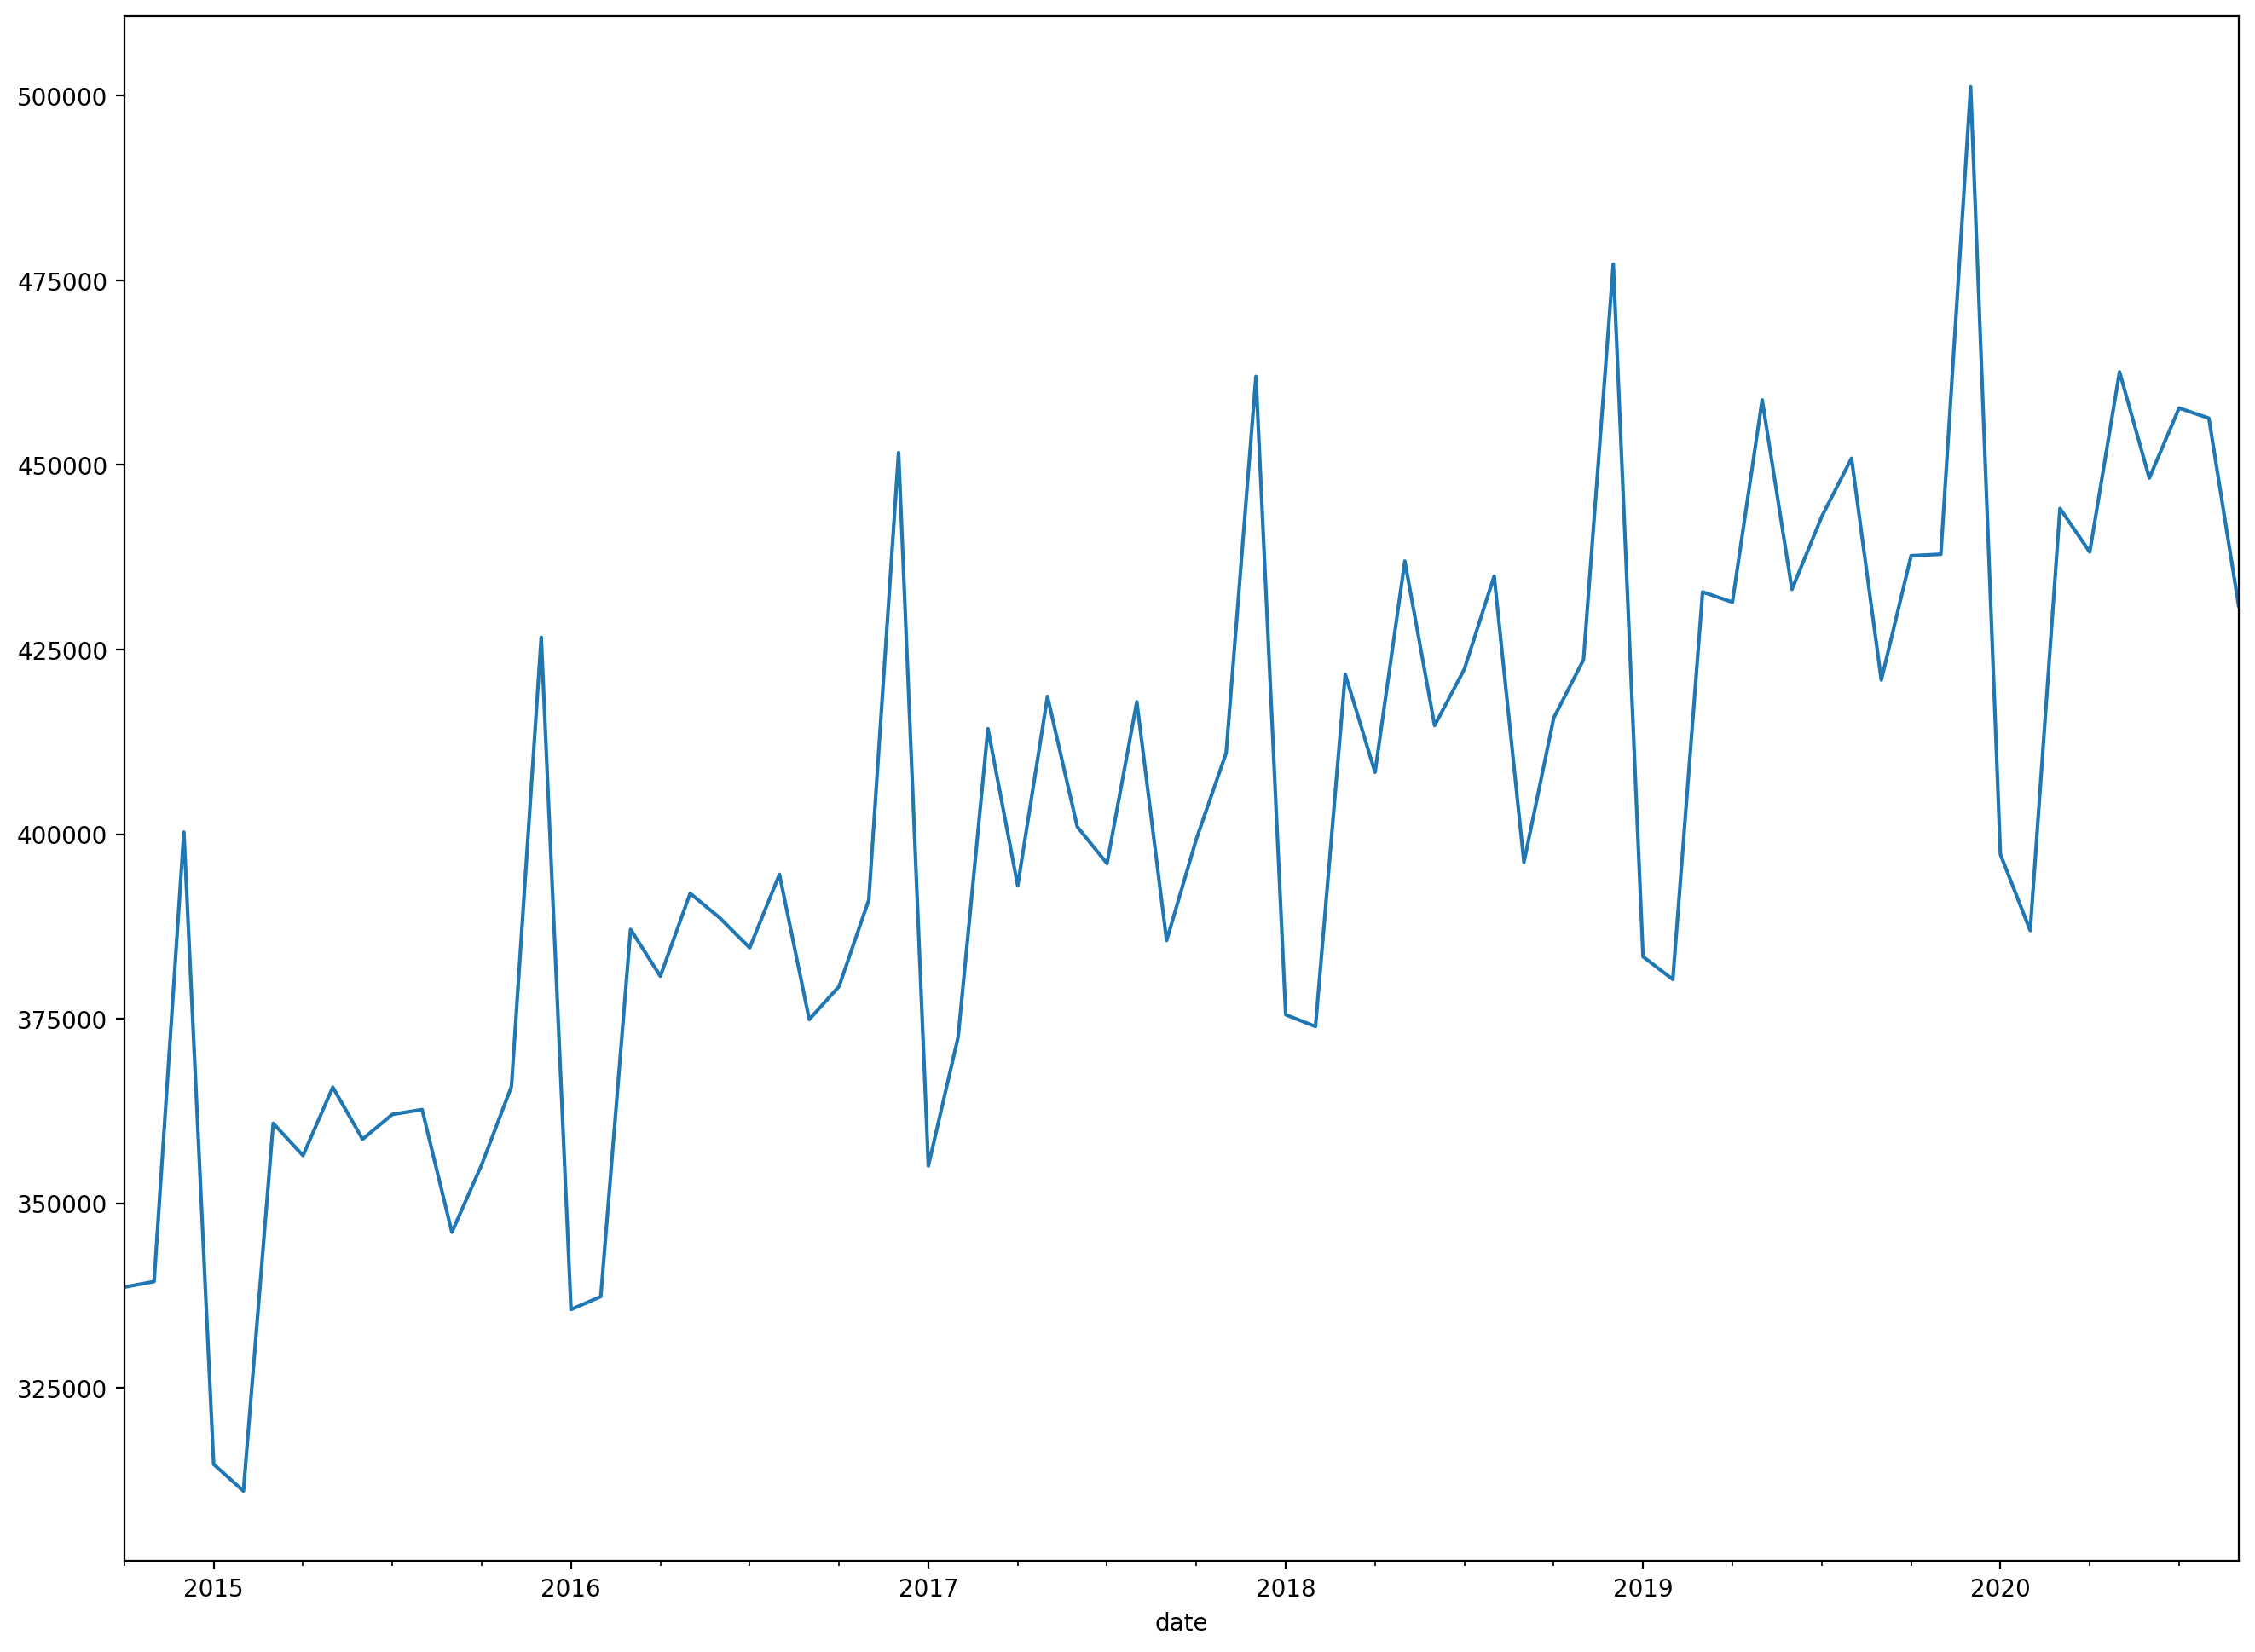

In [4]:
df['sales'].plot()

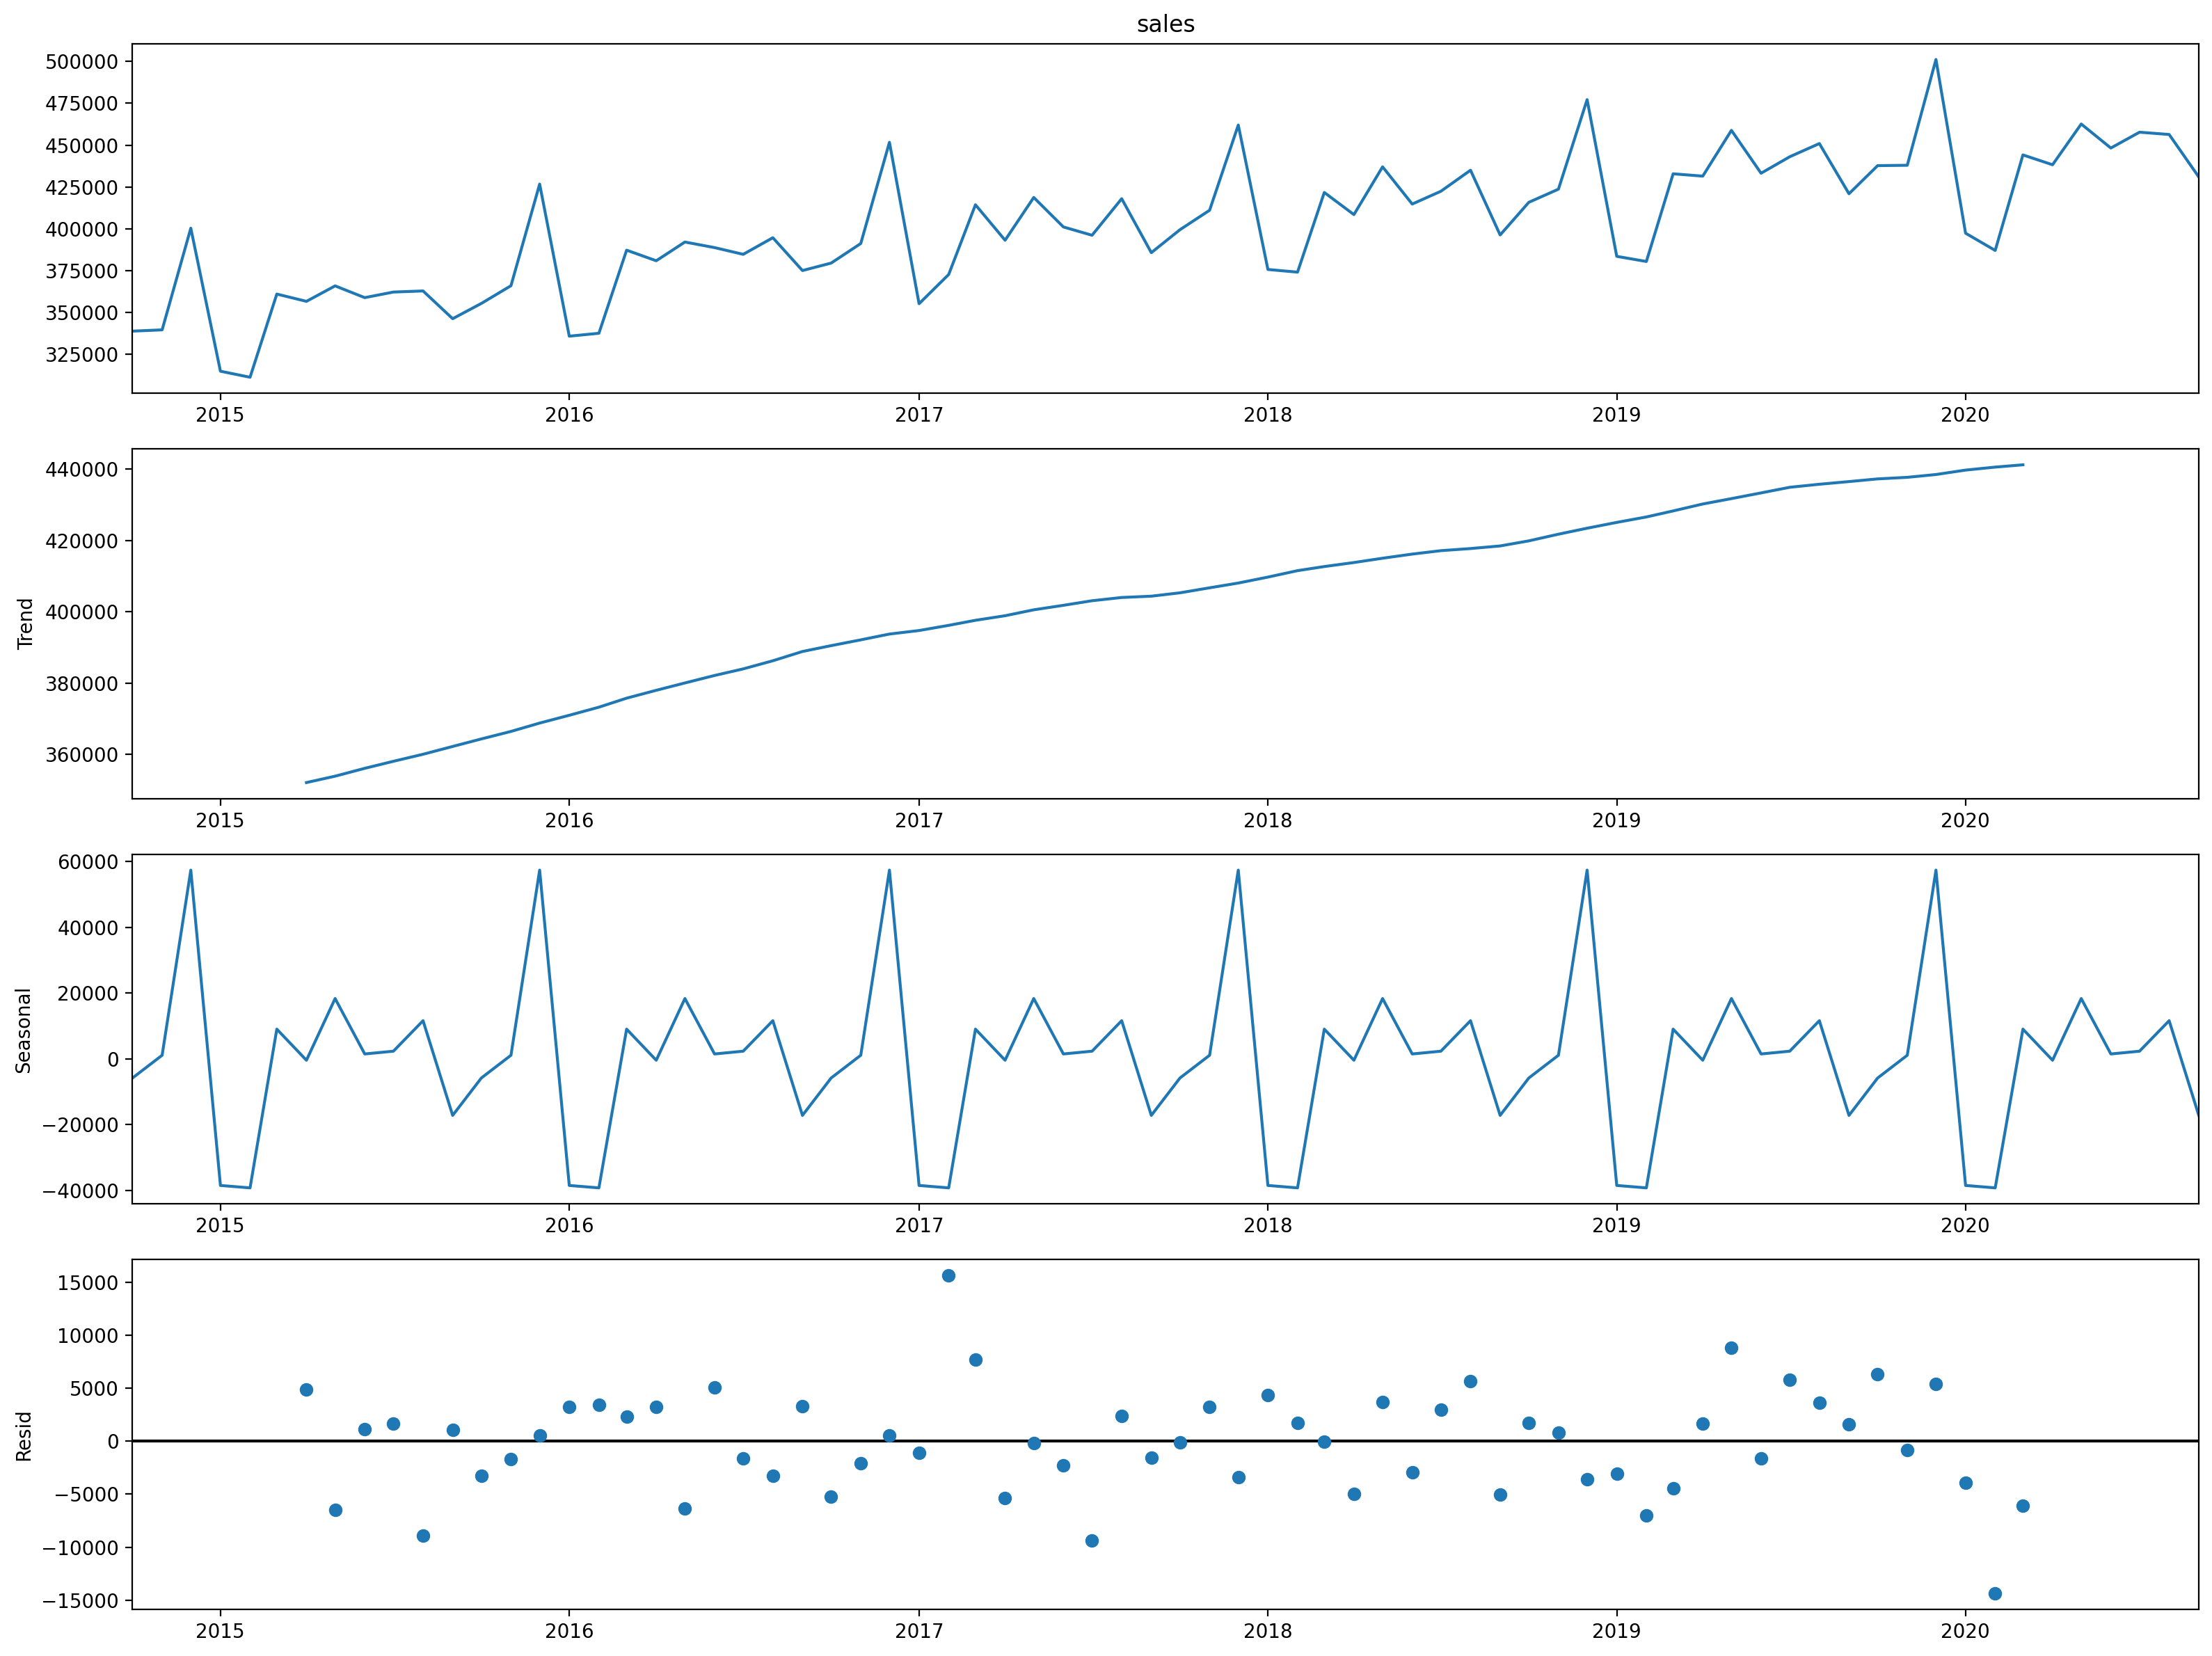

In [15]:
decomposed = seasonal_decompose(df['sales'])
decomposed.plot();

In [6]:
#Check stationary using ADF
print(adf_test(df['sales'])) #có dừng yếu và dừng mạnh -> trường hợp này là dừng yếu
# giá trị tuyệt đối của 3 giá trị cuối nếu nhỏ hơn ADF test trị tuyệt đối là dừng 

ADF test:              -4.344563
p value                 0.000372
# of Lags              11.000000
# of Observations      60.000000
Critical value(1%)     -3.544369
Critical value(5%)     -2.911073
Critical value(10%)    -2.593190
dtype: float64


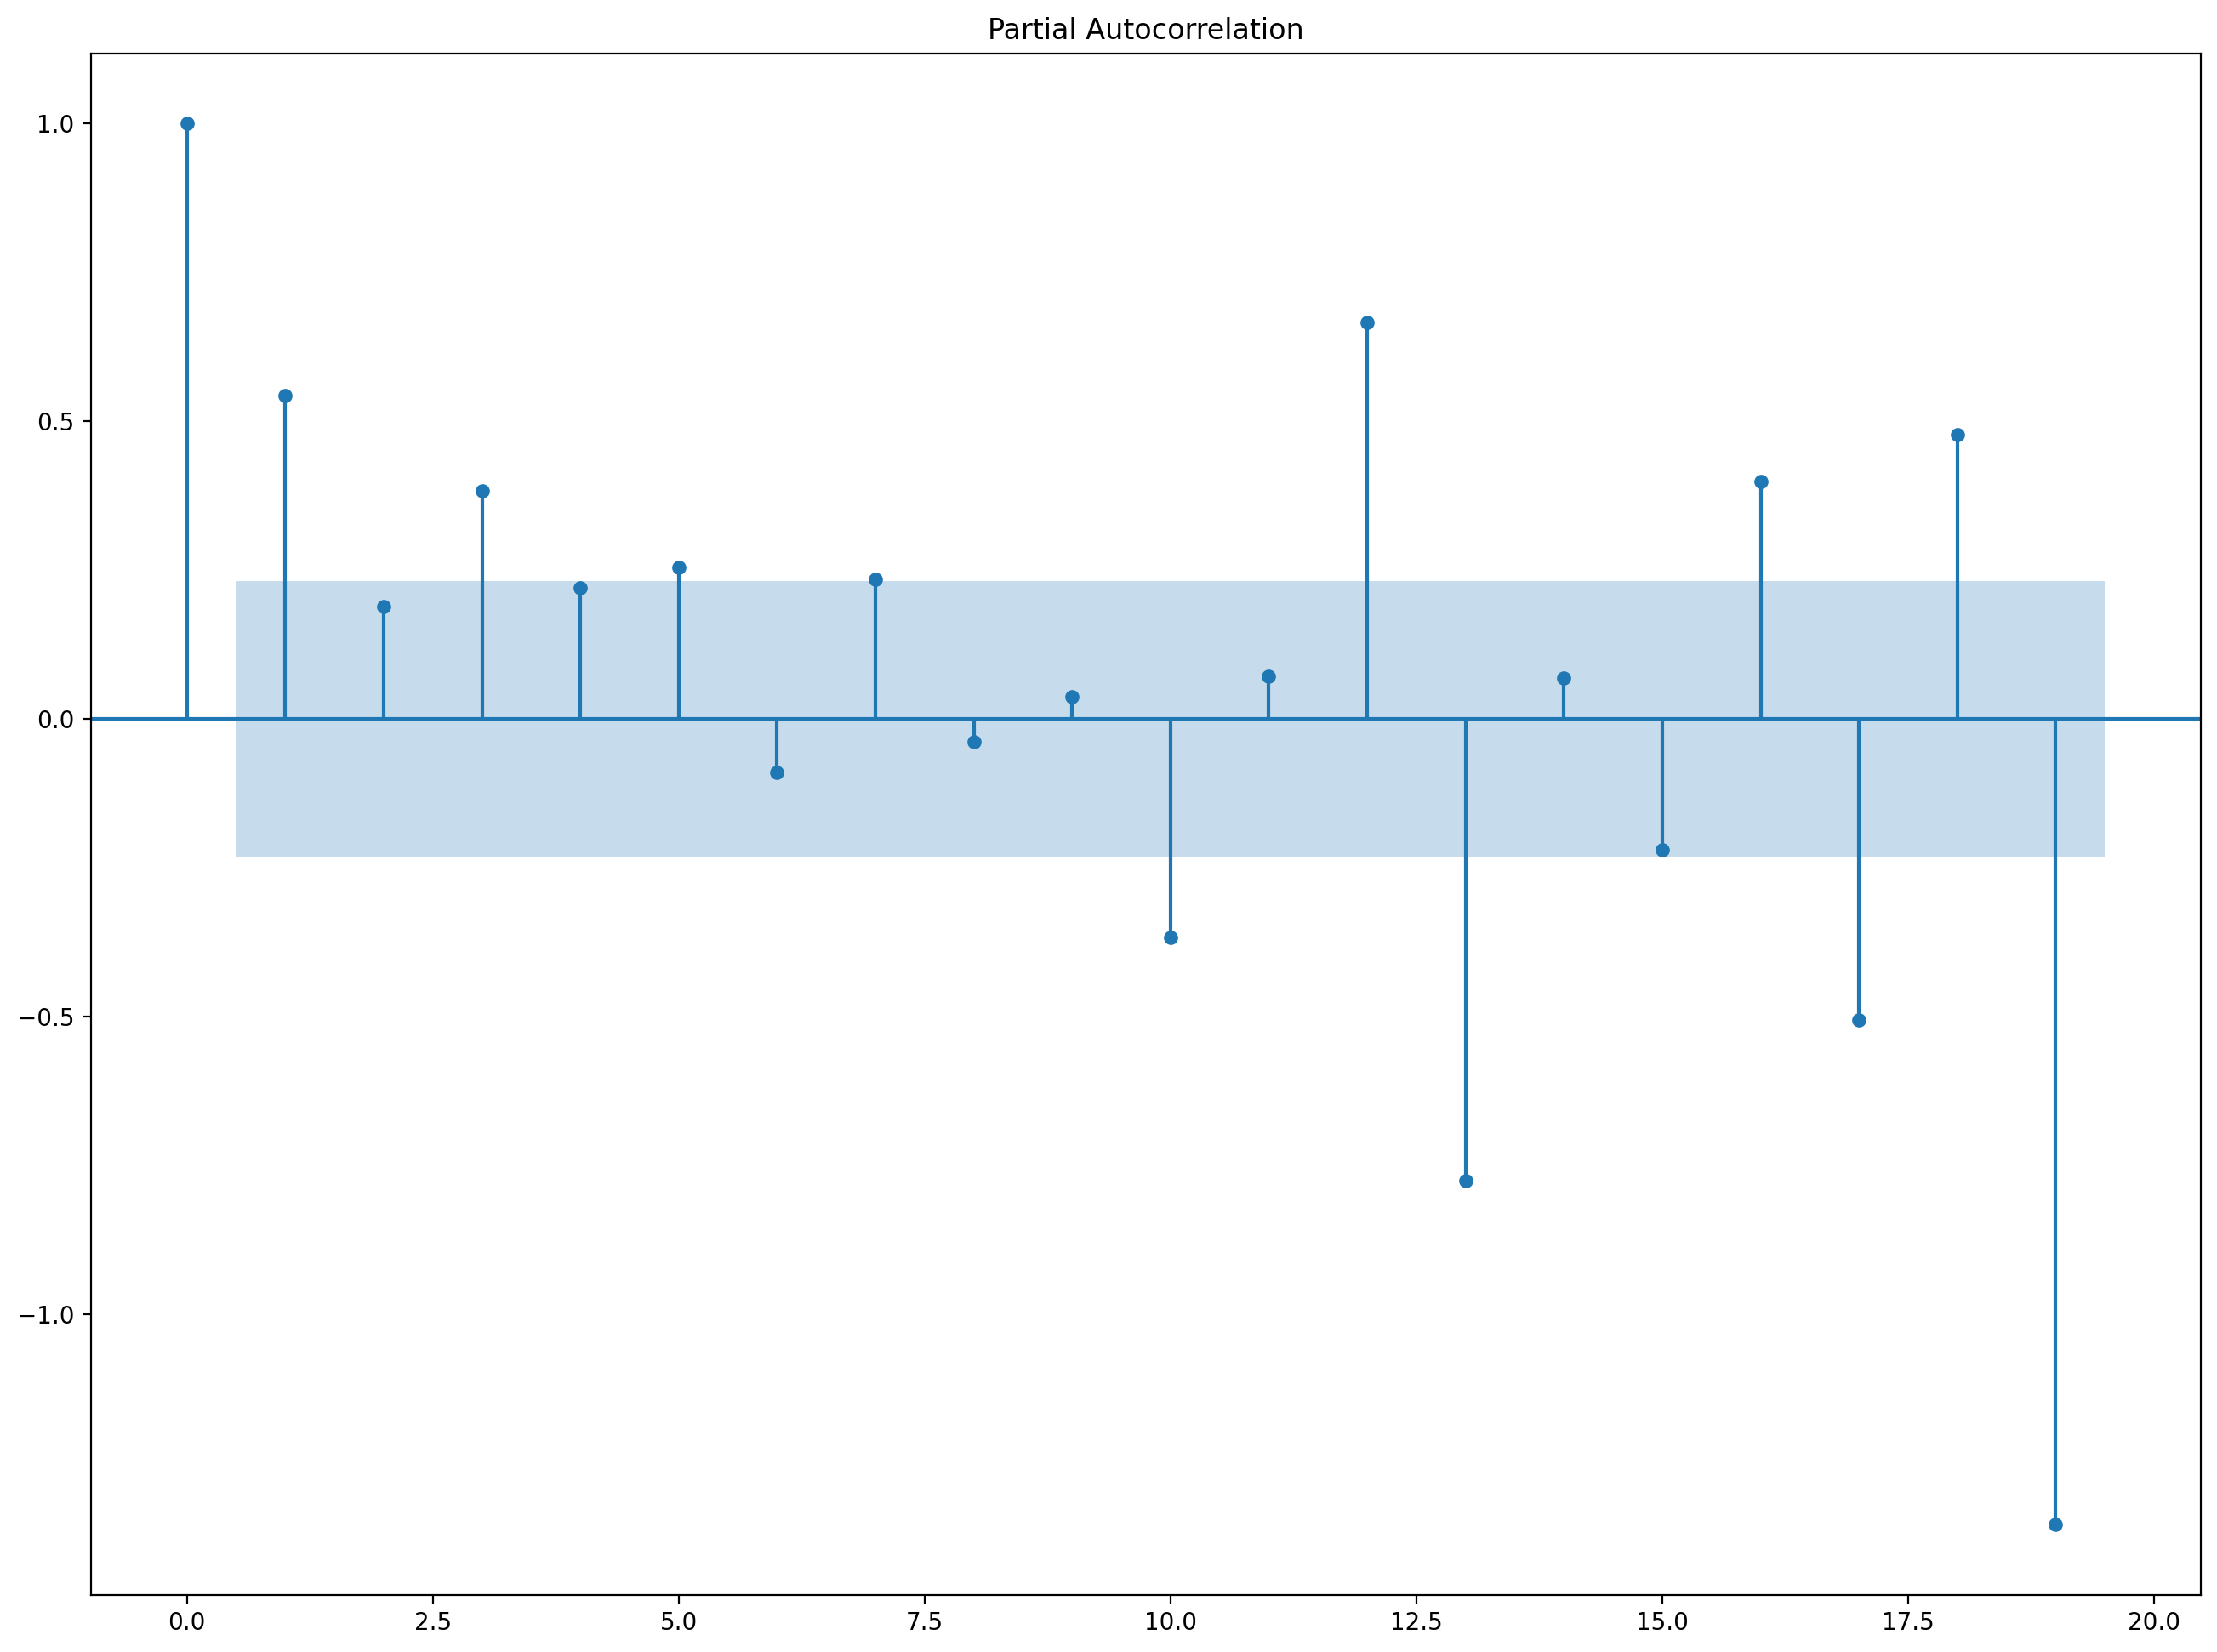

In [20]:
pacf = plot_pacf(df['sales']) #Xác định tham số p cho mô mình tự hồi quy

In [21]:
#Split dataset
train = np.array(Y[:len(Y)-10])
test = np.array(Y[len(Y)-10:])

In [23]:
model = AutoReg(train, lags= 11).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:                    AutoReg(11)   Log Likelihood                -570.984
Method:               Conditional MLE   S.D. of innovations          17620.559
Date:                Thu, 05 Aug 2021   AIC                             20.063
Time:                        14:31:28   BIC                             20.556
Sample:                            11   HQIC                            20.252
                                   62                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.406e+04   4.52e+04      0.311      0.756   -7.45e+04    1.03e+05
y.L1          -0.3132      0.131     -2.391      0.017      -0.570      -0.056
y.L2          -0.2831      0.130     -2.185      0.029      -0.537      -0.029
y.L3           0.1429      0.135      1.058      0.290      -0.122       0.408
y.L4           0.2604      0.139      1.878      0.060      -0.011       0.532
y.L5           0.6338      0.118      5.352      0.000       0.402       0.866
y.L6           0.4348      0.134      3.241      0.001       0.172       0.698
y.L7           0.5850      0.111      5.268      0.000       0.367       0.803
y.L8           0.2376      0.128      1.862      0.063      -0.012       0.488
y.L9           0.0790      0.131      0.604      0.546      -0.177       0.335
y.L10         -0.3851      0.132     -2.928      0.003      -0.643      -0.127
y.L11         -0.4066      0.143     -2.842      0.004      -0.687      -0.126
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0030           -0.0000j            1.0030           -0.0000
AR.2             1.1999           -0.0000j            1.1999           -0.0000
AR.3             0.5460           -0.8587j            1.0176           -0.1599
AR.4             0.5460           +0.8587j            1.0176            0.1599
AR.5             0.0293           -1.0285j            1.0289           -0.2455
AR.6             0.0293           +1.0285j            1.0289            0.2455
AR.7            -0.5341           -0.9519j            1.0915           -0.3314
AR.8            -0.5341           +0.9519j            1.0915            0.3314
AR.9            -0.9228           -0.5259j            1.0622           -0.4176
AR.10           -0.9228           +0.5259j            1.0622            0.4176
AR.11           -1.3868           -0.0000j            1.3868           -0.5000
------------------------------------------------------------------------------
"""

In [26]:
#Pridict on test dataset
pred_values = model.predict(start=len(train), end=len(Y)-1, dynamic = False)
print(pred_values)

[502502.59917674 458518.74170672 423842.46469104 448998.49124658
 452741.24296169 479042.2637545  459215.2828701  471485.34646975
 474223.96942864 454657.50690067]


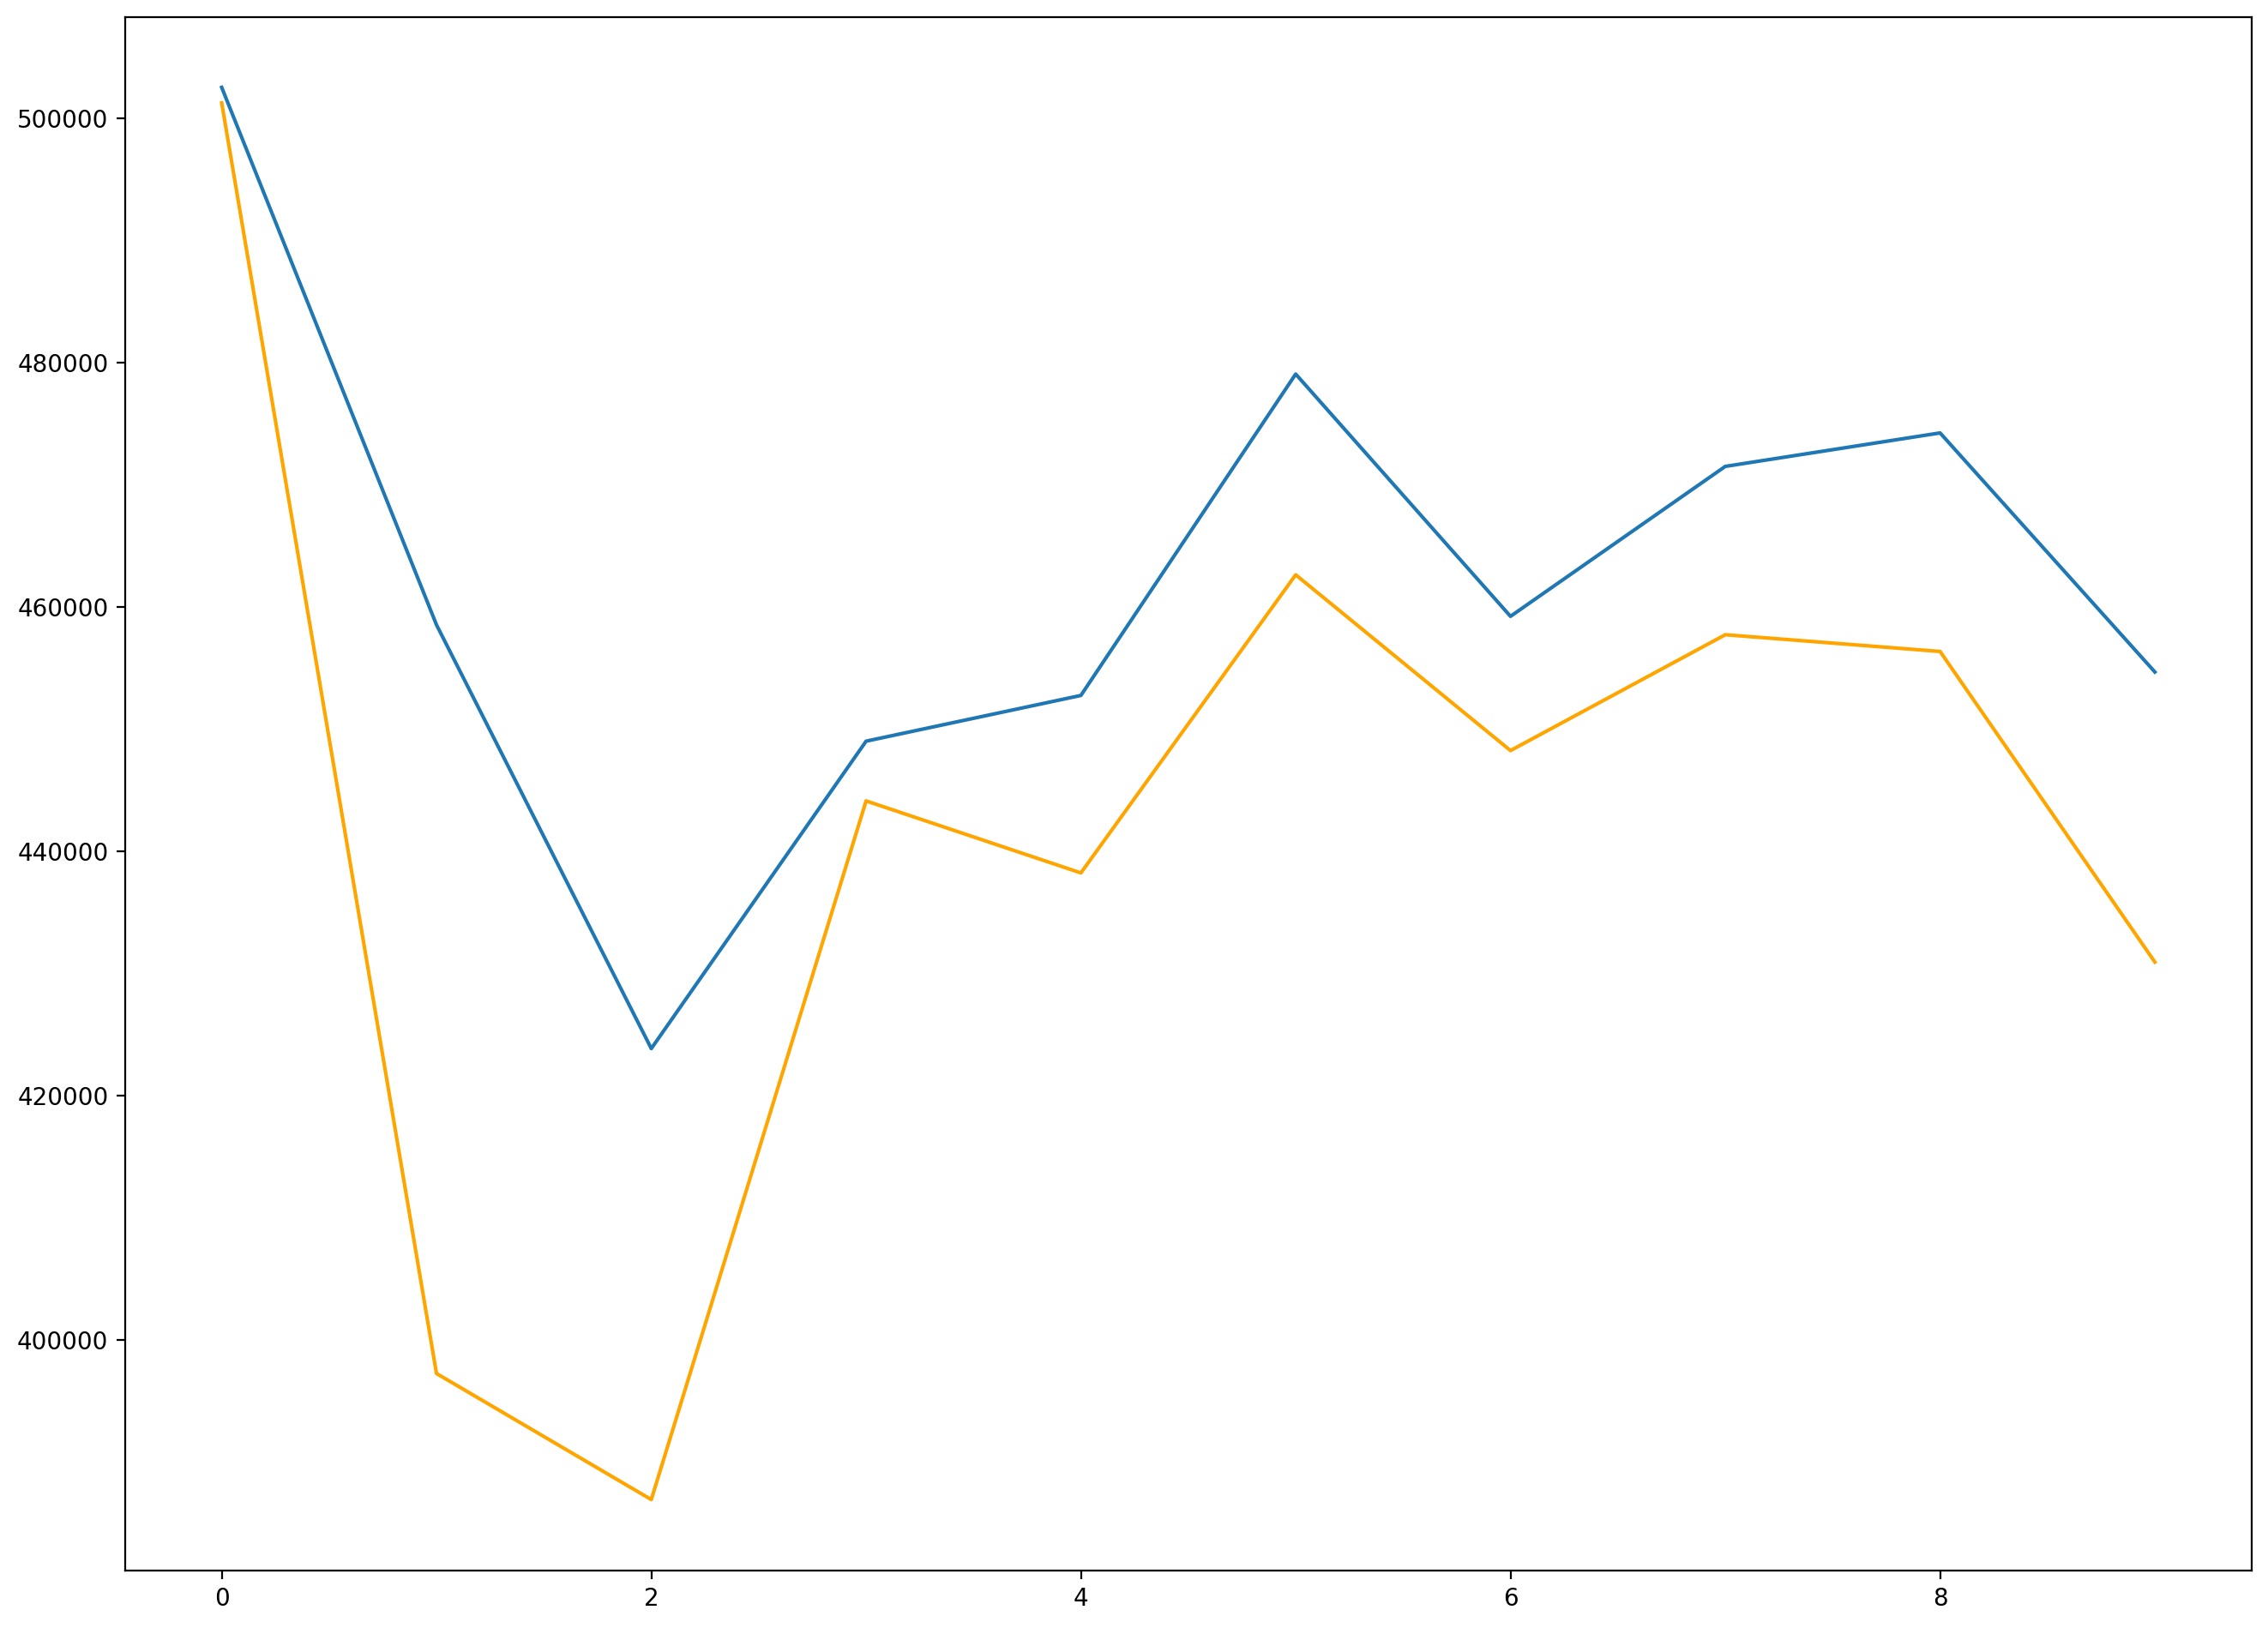

In [27]:
plt.plot(pred_values)
plt.plot(test, color = 'orange')

In [35]:
#Calculate Error
R_sqrt = r2_score(test, pred_values)
rmse = sqrt(mean_squared_error(test, pred_values))